# Malignant Comments Classifier Project.

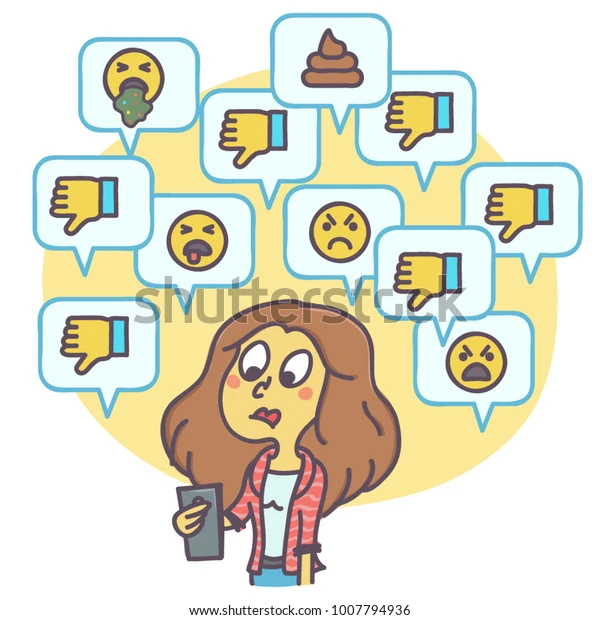


Problem Statement:
    
    
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.

Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.

There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

In [3]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.read_excel()

In [50]:
# Train Dataset
df_train = pd.read_csv("train.csv") # Reading csv file
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [51]:
# Test Dataset
df_test = pd.read_csv("test.csv") # Reading csv file
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [52]:
print("The no. of Rows in dataset is: ",df_train.shape[0],"and no. of columns is ",df_train.shape[1])

The no. of Rows in dataset is:  159571 and no. of columns is  8


In [53]:
print("The no. of Rows in dataset is: ",df_test.shape[0],"and no. of columns is ",df_test.shape[1])

The no. of Rows in dataset is:  153164 and no. of columns is  2


The train dataset is comprised of both dependent variable (target) and independent variables. In train dataset the label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment. Since the target variable is consists of 2 classes 0 and 1 which can be termed as categorical in nature which makes this to be a "Classification Problem".

The test dataset contains only independent variables.

Feature Information:
    
    
Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.
Highly Malignant: It denotes comments that are highly malignant and hurtful.
Rude: It denotes comments that are very rude and offensive.
Threat: It contains indication of the comments that are giving any threat to someone.
Abuse: It is for comments that are abusive in nature.
Loathe: It describes the comments which are hateful and loathing in nature.
ID: It includes unique Ids associated with each comment text given.
Comment text: This column contains the comments extracted from various social media platforms.

In [54]:
# sample 10 rows
df_train.sample(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
95598,ffad17404f4a9a65,Deletion of Compilation for Bahai Faith \n\n(t...,0,0,0,0,0,0
77333,cf2b2a0ccc2107e1,"""\n\n Wikipedia Ambassador update! \n\nHi! You...",0,0,0,0,0,0
85891,e5be0de58aeac002,I said Ph.D in science but that's besides the ...,0,0,0,0,0,0
75379,c9a78966fcaafc60,I hope you get de-admined. 66.90.229.72,0,0,0,0,0,0
71880,c076b7ec56ae856f,"""\nIt worked. Thanks! (talk) """,0,0,0,0,0,0
20957,374e250f1d0bc930,Calm Down \n\nPlease read WP:NPA and WP:Civili...,0,0,0,0,0,0
14462,2632455bf1838b1b,"""\n\nIt is rare but people in their 30's and I...",0,0,0,0,0,0
138811,e6c9cd2e9164a6ae,Sinead O'Connor in a tuxedo\n\nThese rumours a...,0,0,0,0,0,0
12374,20cc5dd8249c55c0,"""::Resolute: I'm a little busy now been doing...",0,0,0,0,0,0
67370,b4423acbeee9f724,FYI: I've left the project as an editor. But t...,0,0,0,0,0,0


In [55]:
df_test.sample(10)

,id,comment_text
18300,1ecc1c7d9e555eaa,"Ugh, what a bitch. Ate dinner with my parents..."
48974,5153347d20648a90,it was constructive. \n\n he's fat. \n\n just ...
57083,5ef8f1492bdfa660,""" \n :::::::WCM, my proposal is: """"After sever..."
4834,082a62147a8a874e,== Modern scrimshaw == \n\n This article sugge...
77603,81710dc81dcc4878,""" \n ***I feel so strange about this, Crisco. ..."
13456,16a720ecbc4db22c,Kayne West is a douchbag
62275,67a1b64ba7bdfb74,PS: Too many rams just want to collide heads.
6594,0b13a62ab639f28e,== example images == \n\n The ROFL waffle imag...
28209,2ef149aa7e635dfb,""" \n :It looks like the page has been updated. """
134934,e18fd3a11b7be72e,My grand parents are killed by Armenians but y...


Exploratory Data Analysis (EDA)

In [56]:
# Checking all column names (TRAIN)
df_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [57]:
# Checking all column names (TEST)
df_test.columns

Index(['id', 'comment_text'], dtype='object')

In [58]:
# Checking the data types of all columns (TRAIN)
df_train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [59]:
# Checking the data types of all columns (TEST)
df_test.dtypes

id              object
comment_text    object
dtype: object

In [60]:
# Checking the info of the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [62]:
# Checking the info of the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


The train dataset contains 2 different types of data, integer and object. 

There are 2 columns with object datatype

The test dataset contains only object data type. We will encode the object datatypes using appropriate encoding techniques before building machine learning models.

In [63]:
# Checking for null values
print("Null values in train dataset: \n", df_train.isnull().sum())
print("\nNull values in test dataset: \n", df_test.isnull().sum())

Null values in train dataset: 
 id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

Null values in test dataset: 
 id              0
comment_text    0
dtype: int64


There are no null values in both the data sets. 

Lets check for Duplicate values .

In [65]:
df_train=df_train.drop_duplicates()

In [66]:
df_train.shape

(159571, 8)

In [67]:
df_test=df_test.drop_duplicates()

In [68]:
df_test.shape

(153164, 2)

In [71]:
# Checking for duplicate values if there are any
print("Duplicate entries in the train dataset:", df_train.duplicated().sum())
print("Duplicate entries in the test dataset:", df_test.duplicated().sum())

Duplicate entries in the train dataset: 0
Duplicate entries in the test dataset: 0


No duplicate value is present in both the datasets.

Null values are very less in numbers as compared to our datasets and we can drop them.

In [108]:
train_mc.dropna(inplace=True)

In [109]:
test_mc.dropna(inplace=True)

In [110]:
train_mc.shape

(159509, 8)

In [111]:
test_mc.shape

(153157, 2)

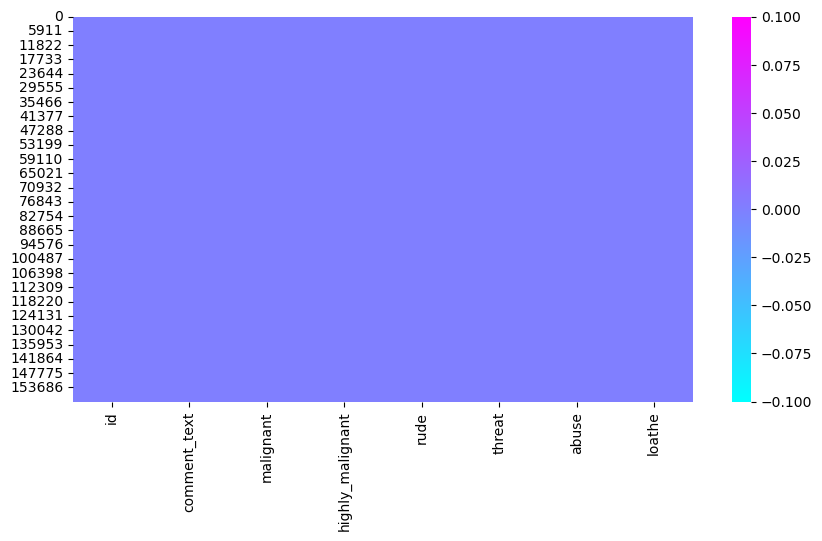

In [69]:
# Visualizing the null values clearly in train dataset using heat map
plt.figure(figsize=(10,5))
sns.heatmap(train_mc.isnull(), cmap="cool")
plt.show()

It is clear from the heat map that there are no null values in any of the column.

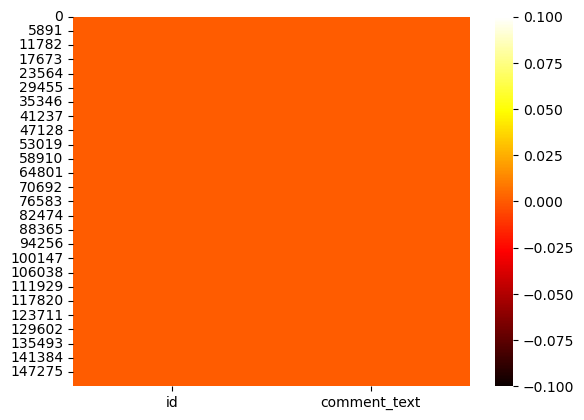

In [70]:
# Visualizing the null values clearly in test dataset using heat map
sns.heatmap(df_test.isnull(), cmap="hot")
plt.show()

It is clear from the heat map that there are no null values in any of the column.

In [72]:
# Checking the number of unique values in each column of dataset
df_train.nunique().to_frame("No of Unique Values")

,No of Unique Values
id,159571
comment_text,159571
malignant,2
highly_malignant,2
rude,2
threat,2
abuse,2
loathe,2


Above are the number of unique values present in the columns of the train dataset.

In [73]:
# Dropping id column 
df_train.drop(["id"],axis=1,inplace = True)

I have dropped id column as it was containing only unique values for every row which we don't want for predictions.

In [74]:
# Checking value counts for each feature
columns=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']
for col in columns:
    print("Value Counts of {} :".format(col, df_train[col].nunique()))
    print(df_train[f'{col}'].value_counts())
    print('-'*40)

Value Counts of malignant :
0    144277
1     15294
Name: malignant, dtype: int64
----------------------------------------
Value Counts of highly_malignant :
0    157976
1      1595
Name: highly_malignant, dtype: int64
----------------------------------------
Value Counts of rude :
0    151122
1      8449
Name: rude, dtype: int64
----------------------------------------
Value Counts of threat :
0    159093
1       478
Name: threat, dtype: int64
----------------------------------------
Value Counts of abuse :
0    151694
1      7877
Name: abuse, dtype: int64
----------------------------------------
Value Counts of loathe :
0    158166
1      1405
Name: loathe, dtype: int64
----------------------------------------


These are the value counts of the columns present in the train dataset.

In [75]:
# Checking the statistical summary of the train dataset
df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The summary of this dataset looks perfect since there is no negative/ invalid values present.

From the above description we can observe that the counts of every column is same which means there are no missing values present in the dataset.

The minimum and maximum values of the features are same, they have 0 and 1 respectively.

The mean and standard deviation is nearly 0-1 of all the attributes in the training dataset.

By summarizing the data we can say there are no outliers but the data is skewed to right in all the columns which means presence of skewness. Since we have only categorical columns there is no need to remove outliers or skewness.

In [76]:
# Let's see how the comments look like in train dataset
df_train['comment_text'].value_counts()

Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

By observing the value counts of the comments we can say that there are many words, numbers, as well as punctuations which are not important for our predictions. So we need to do lot of text processing.

In [77]:
# Checking the percentage of good and bad comments from all features combiningly in dataset 
good_comments = df_train[(df_train['malignant']!=1) & (df_train['highly_malignant']!=1) & (df_train['rude']!=1) & 
                            (df_train['threat']!=1) & (df_train['abuse']!=1) & (df_train['loathe']!=1)]
percent=len(good_comments)/len(df_train)*100
print('Percentage of positive comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of positive comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


We can observe about 90 % of the comments are positive and only 10 % of the comments are negative.

In [78]:
# Checking the percentage of comments that are toxic compared to normal comments
cols=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe',]
for col in cols:
    print("Percentage of toxic comments compared to normal comments in {} :".format(col, df_train[col].value_counts(normalize=True)*100))
    print(df_train[f'{col}'].value_counts(normalize=True)*100)
    print('-'*50)

Percentage of toxic comments compared to normal comments in malignant :
0    90.415552
1     9.584448
Name: malignant, dtype: float64
--------------------------------------------------
Percentage of toxic comments compared to normal comments in highly_malignant :
0    99.000445
1     0.999555
Name: highly_malignant, dtype: float64
--------------------------------------------------
Percentage of toxic comments compared to normal comments in rude :
0    94.705178
1     5.294822
Name: rude, dtype: float64
--------------------------------------------------
Percentage of toxic comments compared to normal comments in threat :
0    99.700447
1     0.299553
Name: threat, dtype: float64
--------------------------------------------------
Percentage of toxic comments compared to normal comments in abuse :
0    95.063639
1     4.936361
Name: abuse, dtype: float64
--------------------------------------------------
Percentage of toxic comments compared to normal comments in loathe :
0    99.119514
1

As we know 1 indicates the good or neutral comments and 0 indicates the negative comments. So, from the above we can infer that more than 90 % of the comments in all the columns fall down into negative or bad and only few comments are considered to be good.

Feature Engineering

We shall create a new column "label" which is the sum of all the target features.

In [79]:
# Creating a new feature having negative and non negative comments for the particular comment.
colmn = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_train[colmn].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [80]:
# Label column is the sum of all the target features
df_train['label'] = train_mc[colmn].sum(axis=1)
df_train.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [81]:
df_train.label.value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

In [82]:
# Scaling the label column i.e. converting it from multiple labels into binary
df_train['label'] = df_train['label'] > 0
df_train['label'] = df_train['label'].astype(int)
df_train.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [83]:
# Checking value counts for label after scaling
df_train.label.value_counts()

0    143346
1     16225
Name: label, dtype: int64

In [84]:
# Creating new column for length of comments
df_train['comment_length']=df_train.comment_text.str.len()
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [85]:
# Adding new column comment_length to check length of comment_text characters in test data
df_test['comment_length']=df_test.comment_text.str.len()
df_test

,id,comment_text,comment_length
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",502


Data Visualization

Univariate Analysis:

In [86]:
# Storing the number of counts for every target label
counts=df_train.iloc[:,1:].sum()
counts

malignant              15294
highly_malignant        1595
rude                    8449
threat                   478
abuse                   7877
loathe                  1405
label                  16225
comment_length      62893130
dtype: int64

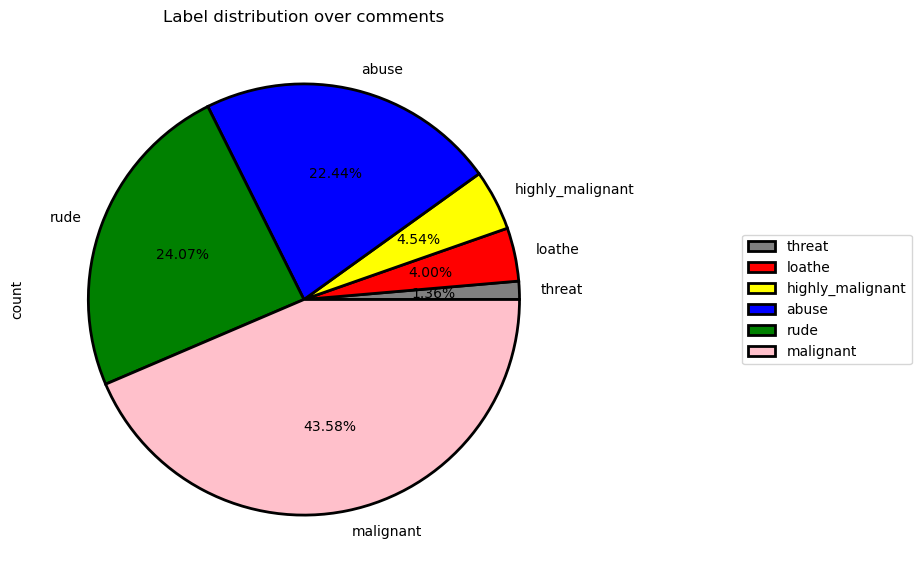

In [87]:
# Label distribution comments using pie chart
labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
colors = ["grey", "red","yellow","blue","green","pink"]

x = df_train[labels].sum().to_frame().rename(columns={0: 'count'}).sort_values('count')
x.plot.pie(y = 'count', title = 'Label distribution over comments',autopct='%.2f%%', colors=colors,figsize = (7,7),
          wedgeprops = {'linewidth':2, 'edgecolor':'k'})\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

Observations:

From the pie chart we can notice approximately 43.58 % of the comments are malignant, 24.07 % of the comments are rude and 22.44 % are abuse. The count of malignant comments are high compared to other type of comments and the count of threat comments are very less.

0    143346
1     16225
Name: label, dtype: int64


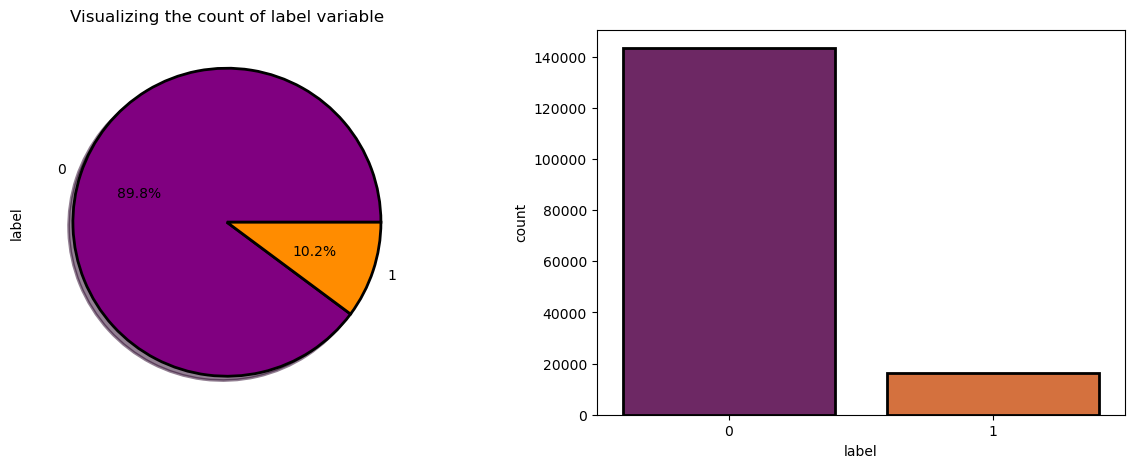

In [90]:
# Visualizing count of negative and non negative comments combining 
print(df_train['label'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["purple", "darkorange"]
df_train['label'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':2, 'edgecolor':'k'}, colors=colors,
                                           title = 'Visualizing the count of label variable')
ax = sns.countplot('label', data=df_train, ax=ax[1],palette="inferno",linewidth=2, edgecolor="k")
plt.show()

Observations:

From the above plots we can observe the count of negative comments are high compared to the non negative comments. Here around 89.08% of the comments are turned out to be a negative comments and only 10.2 % of them are considered to be positive or neutral comments. We can also observe the data imbalance issue here, we need to balance the data.

0    144277
1     15294
Name: malignant, dtype: int64


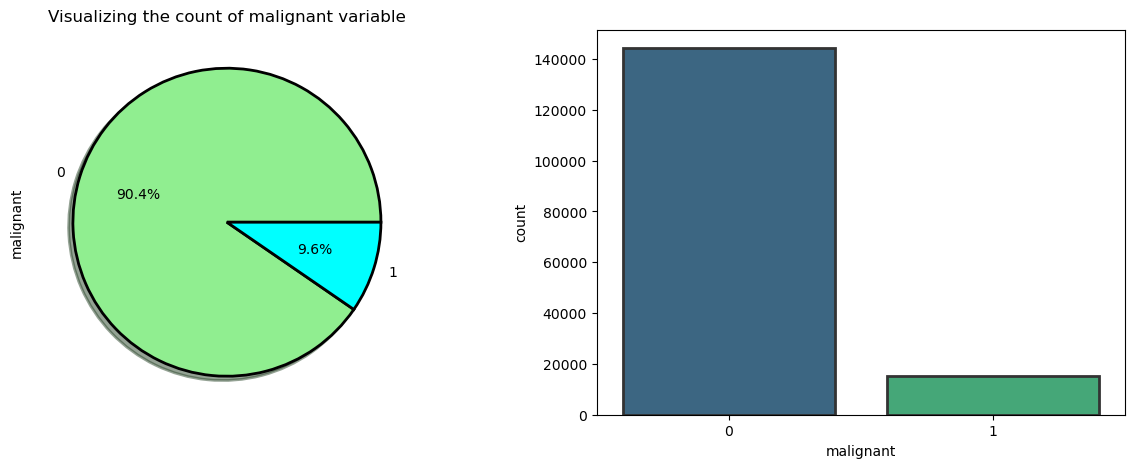

In [91]:
# Visualizing count of malignant and non malignant comments
print(df_train['malignant'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["lightgreen", "cyan"]
df_train['malignant'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,colors=colors,
                                              wedgeprops = {'linewidth':2, 'edgecolor':'k'},
                                              title = 'Visualizing the count of malignant variable')
ax = sns.countplot('malignant', data=df_train, ax=ax[1],palette="viridis",linewidth=2, edgecolor=".2")
plt.show()

Observations:

From the above plots we can observe the count of malignant comments are high compared to non malignant comments. That is around 90.4 % of the comments are malignant and only 9.6 % of the comments are good.

0    157976
1      1595
Name: highly_malignant, dtype: int64


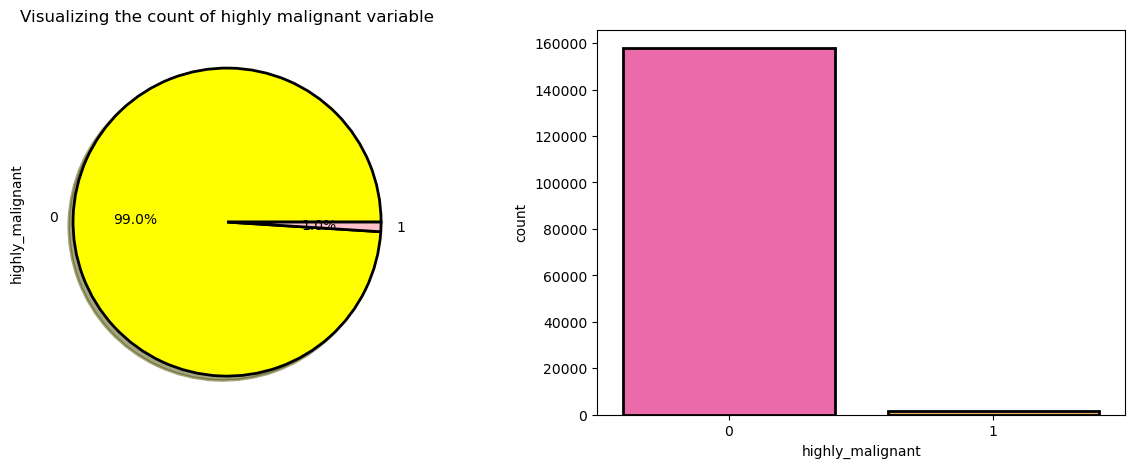

In [92]:
# Visualizing count of highly malignant and normal comments
print(df_train['highly_malignant'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["yellow", "pink"]
df_train['highly_malignant'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':2, 'edgecolor':'k'},
                                                     colors=colors,title = 'Visualizing the count of highly malignant variable')
ax = sns.countplot('highly_malignant', data=df_train, ax=ax[1],palette="spring",linewidth=2, edgecolor="k")
plt.show()

Observations:

From the plot we can observe the count of highly malignant comments are very high which is about 99 % and only 1 % of the comments are normal.

0    151122
1      8449
Name: rude, dtype: int64


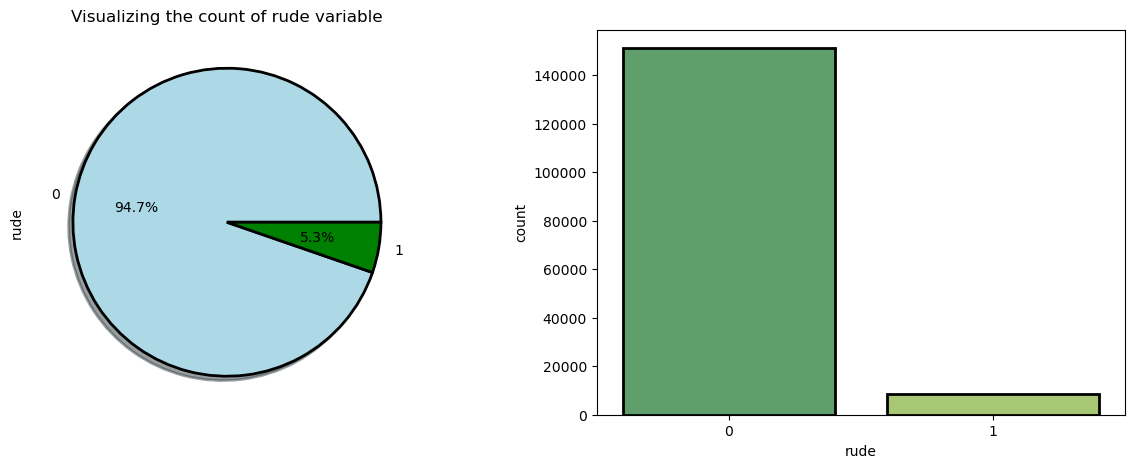

In [93]:
# Visualizing count of rude and normal comments
print(df_train['rude'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["lightblue", "green"]
df_train['rude'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                         wedgeprops = {'linewidth':2, 'edgecolor':'k'},
                                                     colors=colors,title = 'Visualizing the count of rude variable')
ax = sns.countplot('rude', data=df_train, ax=ax[1],palette="summer",linewidth=2, edgecolor="k")
plt.show()

Observations:

The number of rude comments are high compared to normal comments. Around 94.7 % of the comments fall into rude and remaining comments are considered to be normal comments.

0    159093
1       478
Name: threat, dtype: int64


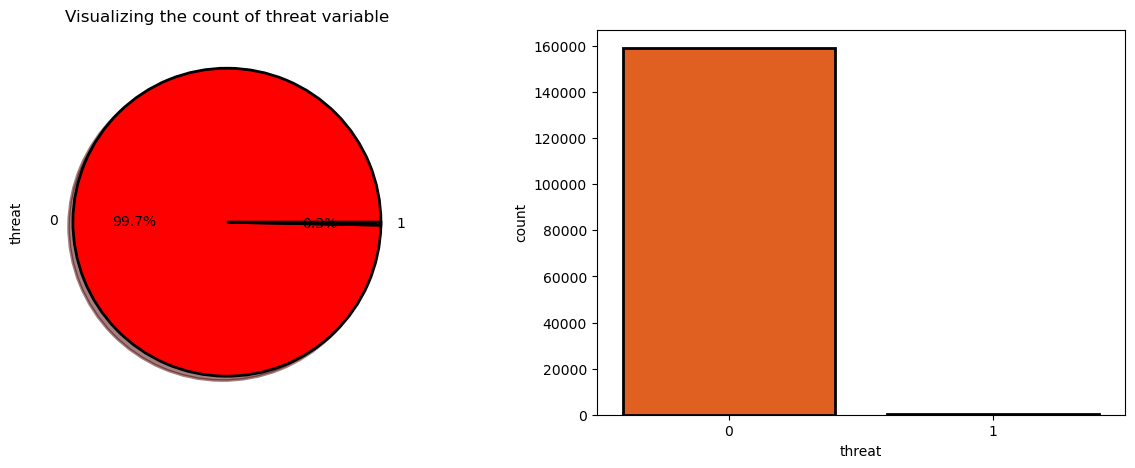

In [94]:
# Visualizing count of threat and normal comments
print(df_train['threat'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["red", "yellow"]
df_train['threat'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                           wedgeprops = {'linewidth':2, 'edgecolor':'k'},
                                                     colors=colors,title = 'Visualizing the count of threat variable')
ax = sns.countplot('threat', data=df_train, ax=ax[1],palette="autumn",linewidth=2, edgecolor="k")
plt.show()

Observations:

In the above visualization also 99.7 % of the comments are threatening and only 0.3 % of the comments look normal.

0    159093
1       478
Name: threat, dtype: int64


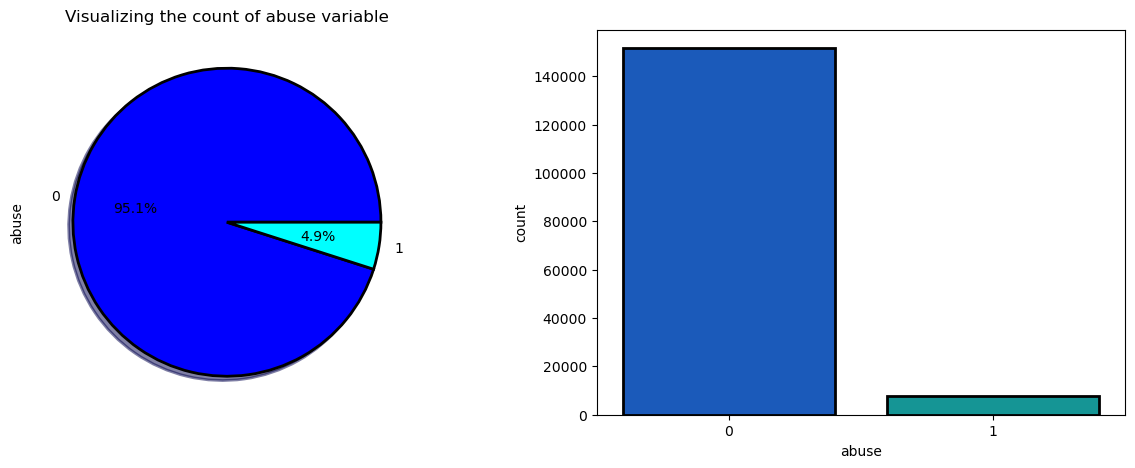

In [96]:
# Visualizing count of abuse and normal comments
print(df_train['threat'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["blue", "cyan"]
df_train['abuse'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':2, 'edgecolor':'k'}, colors=colors,
                                          title = 'Visualizing the count of abuse variable')
ax = sns.countplot('abuse', data=df_train, ax=ax[1],palette="winter",linewidth=2, edgecolor="k")
plt.show()

Observations:

The count of abusing type comments is high which is 95.1 % and only 4.9 % of the comments are normal.

0    158166
1      1405
Name: loathe, dtype: int64


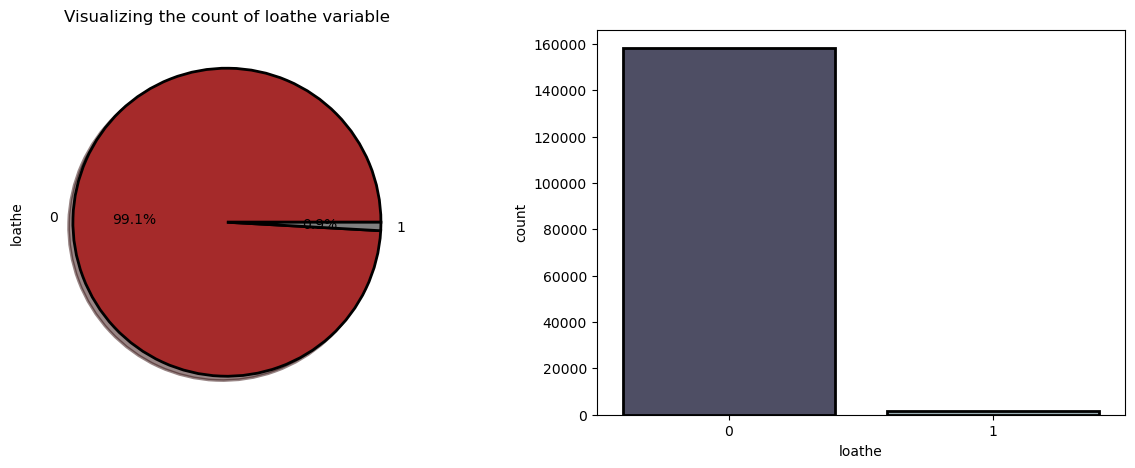

In [97]:
# Visualizing count of loathe and normal comments
print(df_train['loathe'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["brown", "grey"]
df_train['loathe'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':2, 'edgecolor':'k'}, colors=colors,
                                           title = 'Visualizing the count of loathe variable')
ax = sns.countplot('loathe', data=df_train, ax=ax[1],palette="bone",linewidth=2, edgecolor="k")
plt.show()

Observations:

The count of loathe is high (99.1 %) compared to normal (0.9 %) text comments..

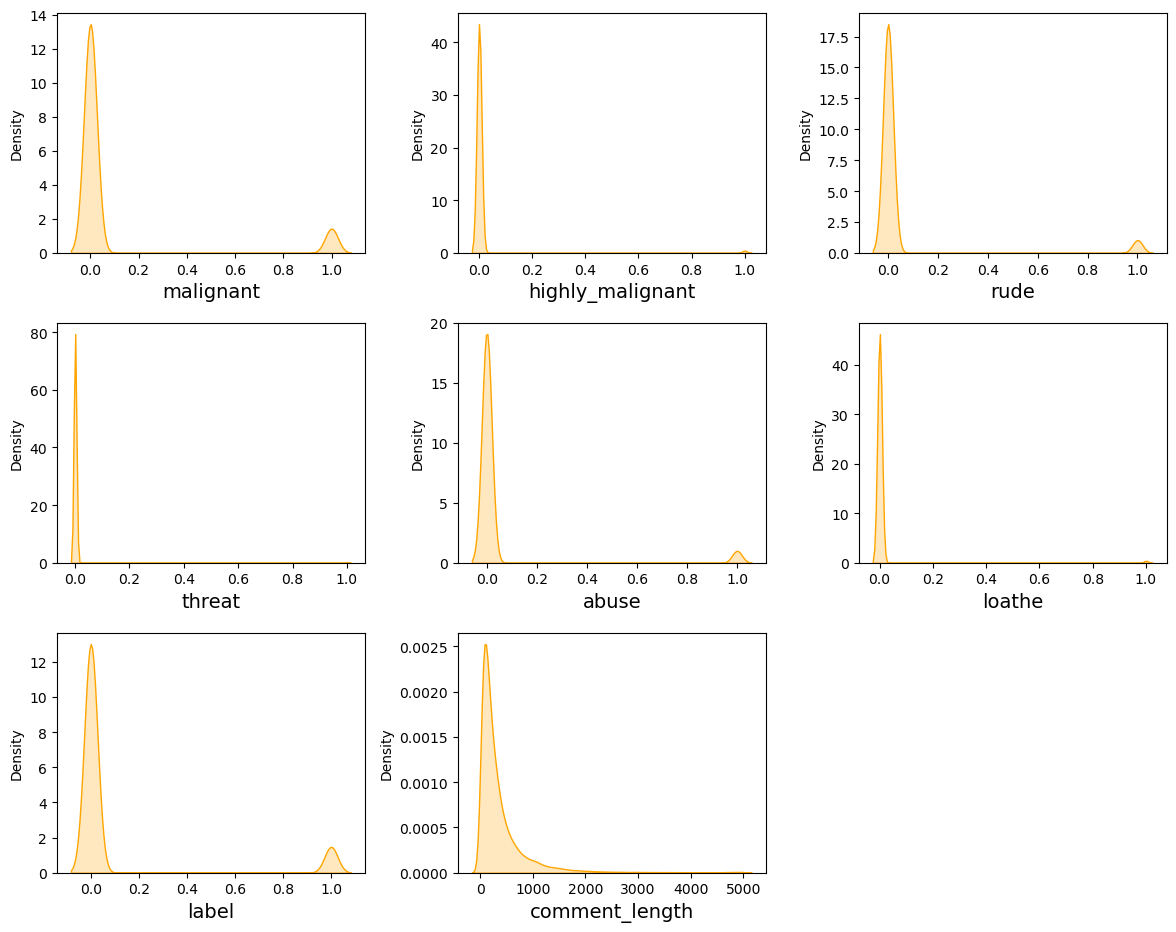

In [99]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in df_train.drop(['comment_text'],axis=1):
    if plotnumber<=8:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_train[column],color="orange",hist=False, kde_kws={"shade": True})
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

Observations:

From the distribution plots we can notice that all the columns are skewed to the right except the comment_label column. Since all the columns are categorical in nature there is no need to remove skewness and outliers in any of the columns.

Text Processing

In [108]:
# Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [109]:
# Replacing '\n' in comment_text
df_train['comment_text'] = df_train['comment_text'].replace('\n',' ')

In [110]:
# Convert all comment texts to lower case in train dataset
df_train['comment_text'] = df_train['comment_text'].str.lower()
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,0,233
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::and for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,you should be ashamed of yourself \n\nthat is ...,0,0,0,0,0,0,0,99
159568,"spitzer \n\numm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,and it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [111]:
# Replacing '\n' in comment_text
df_test['comment_text'] = df_test['comment_text'].replace('\n',' ')

# Convert all comment texts to lower case in test dataset
df_test['comment_text'] = df_test['comment_text'].str.lower()
df_test

,id,comment_text,comment_length
0,00001cee341fdb12,yo bitch ja rule is more succesful then you'll...,367
1,0000247867823ef7,== from rfc == \n\n the title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == sources == \n\n * zawe ashton on lap...",54
3,00017563c3f7919a,":if you have a look back at the source, the in...",205
4,00017695ad8997eb,i don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == okinotorishima categories == \n\n i ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"one of the founding nations of the...",502


I have converted comments into lower case using the above coding in both train and test data.

Now I am going to clean the data by removing/replacing URLs, Numbers, punctuations, converting numbers to words etc.

We can also observe special characters at the top of the common letter or characters if we press a longtime while typing, for example, résumé. If we are not removing these types of noise from the text, then the model will consider resume and résumé; both are two different words. So, I am replacing them as well. Also, removing extra white spaces is also important. We can not get any information from extra spaces, so that we can ignore all additional spaces such as 0ne or more newlines, tabs, extra spaces.

Cleaning data in train dataset

In [112]:
# Replacing email addresses with "email"
df_train["comment_text"] = df_train["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replacing URLs with 'webaddress'
df_train["comment_text"]=df_train["comment_text"].str.replace(r'^https\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replacing money symbols with 'moneysymb' (£ can be typed with ALT key + 156)
df_train["comment_text"] = df_train["comment_text"].str.replace(r'£|\$','dollers')

# Replacing 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_train["comment_text"] = df_train["comment_text"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

# Replacing numbers with 'numbr'
df_train["comment_text"] = df_train["comment_text"].str.replace(r'\d+(\.\d+)?','numbr')

# Removing punctuation
df_train["comment_text"] = df_train["comment_text"].str.replace(r'[^\w\d\s]', ' ')

# Replacing whitespace between terms with a single space
df_train["comment_text"] = df_train["comment_text"].str.replace(r'\s+', ' ')

# Removing leading and trailing whitespace
df_train["comment_text"] = df_train["comment_text"].str.replace(r'^\s+|\s+?$', '')

Removing Stop words

In [120]:
# Removing stopwords from train dataset
stop_words = set(stopwords.words('english') + ['u','ü','ur','4','2','im','dont','doin','ure'])

df_train["comment_text"] = df_train["comment_text"].apply(lambda x:' '.join(term for term in x.split() 
                                                                            if term not in stop_words))
lem=WordNetLemmatizer()
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

Cleaning data in test dataset

In [126]:
# Replacing email addresses with "email"
df_test["comment_text"] = df_test["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replacing URLs with 'webaddress'
df_test["comment_text"] = df_test["comment_text"].str.replace(r'^https\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replacing money symbols with 'moneysymb' (£ can be typed with ALT key + 156)
df_test["comment_text"] = df_test["comment_text"].str.replace(r'£|\$','dollers')

# Replacing 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_test["comment_text"] = df_test["comment_text"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

# Replacing numbers with 'numbr'
df_test["comment_text"] = df_test["comment_text"].str.replace(r'\d+(\.\d+)?','numbr')

# Removing punctuation
df_test["comment_text"] = df_test["comment_text"].str.replace(r'[^\w\d\s]', ' ')

# Replacing whitespace between terms with a single space
df_test["comment_text"] = df_test["comment_text"].str.replace(r'\s+', ' ')

# Removing leading and trailing whitespace
df_test["comment_text"] = df_test["comment_text"].str.replace(r'^\s+|\s+?$', '')

Removing Stop words

We have successfully completed cleaning and pre-processing the data in both train and test datasets.

In [127]:
# Removing stop words from test dataset
stp_words = set(stopwords.words('english') + ['u','ü','ur','4','2','im','dont','doin','ure'])

df_test["comment_text"] = df_test["comment_text"].apply(lambda x:' '.join(term for term in x.split() 
                                                                            if term not in stp_words))
lemma=WordNetLemmatizer()
df_test['comment_text'] = df_test['comment_text'].apply(lambda x: ' '.join(lemma.lemmatize(t) for t in x.split()))

In [128]:
# Creating a new column (clean_length) after removing punctuations, stopwords in train dataset
df_train['clean_length'] = df_train.comment_text.str.len()
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length,clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,168
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,91
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,365
4,sir hero chance remember page,0,0,0,0,0,0,0,67,29
...,...,...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,0,295,178
159567,ashamed horrible thing put talk page numbr numbr,0,0,0,0,0,0,0,99,48
159568,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,0,81,65
159569,look like actually put speedy first version de...,0,0,0,0,0,0,0,116,56


In [129]:
# Creating a new column (clean_length) after removing punctuations, stopwords in test dataset
df_test['clean_length'] = df_test.comment_text.str.len()
df_test

,id,comment_text,comment_length,clean_length
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,227
1,0000247867823ef7,rfc title fine imo,50,18
2,00013b17ad220c46,source zawe ashton lapland,54,26
3,00017563c3f7919a,look back source information updated correct f...,205,109
4,00017695ad8997eb,anonymously edit article,41,24
...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,37
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,198,107
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,423,238
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,502,319


In [132]:
# Total length removal in train data
print('Original Length:',df_train.comment_length.sum())
print('Clean Length:',df_train.clean_length.sum())
print("Total Words Removed:", (df_train.comment_length.sum()) - (df_train.clean_length.sum()))

Original Length: 62893130
Clean Length: 39965479
Total Words Removed: 22927651


Above are the total length of train dataset before and after cleaning data. And the total words removed after preprocessing.

In [133]:
# Total length removal in test data
print('Original Length:',df_test.comment_length.sum())
print('Clean Length:',df_test.clean_length.sum())
print("Total Words Removed:", (df_test.comment_length.sum()) - (df_test.clean_length.sum()))

Original Length: 55885733
Clean Length: 35484713
Total Words Removed: 20401020


Above are the total length of test dataset before and after cleaning data. And the total words removed after preprocessing.

WordClouds

In [134]:
from wordcloud import WordCloud

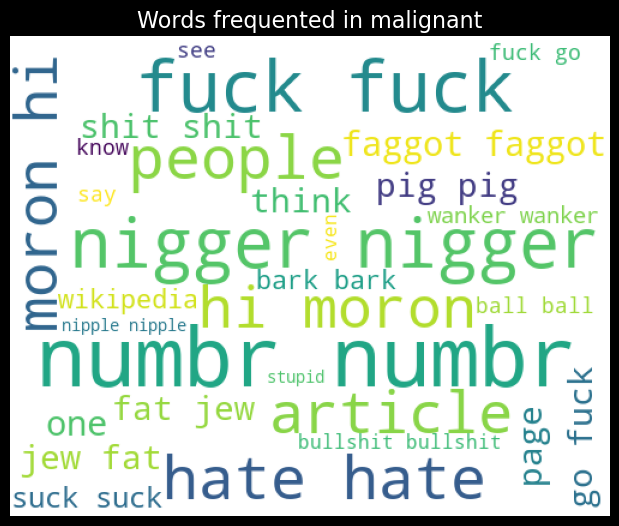

In [139]:
# Malignant Word Cloud
malignants = df_train['comment_text'][df_train['malignant']==1]

malignant_cloud = WordCloud(width=500,height=400,background_color='white',max_words=30).generate(' '.join(malignants))

plt.figure(figsize=(6,6),facecolor='k')
plt.imshow(malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in malignant",fontdict={'fontsize':16, 'color':'white'} )
plt.show()

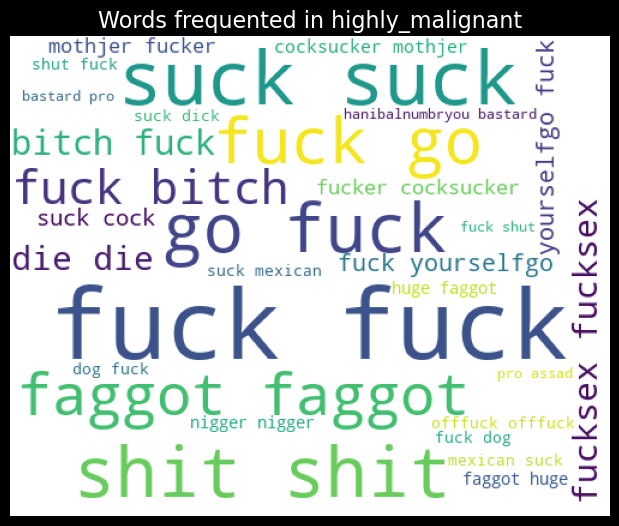

In [140]:
# Highly Malignant Word Cloud
highly_malignants = df_train['comment_text'][df_train['highly_malignant']==1]

high_malignant_cloud = WordCloud(width=500,height=400,background_color='white',
                                 max_words=30).generate(' '.join(highly_malignants))

plt.figure(figsize=(6,6),facecolor='k')
plt.imshow(high_malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in highly_malignant",fontdict={'fontsize':16, 'color':'white'} )
plt.show()

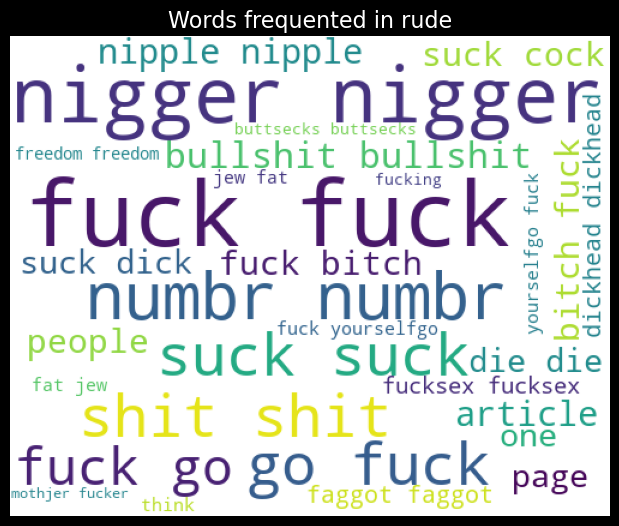

In [141]:
# Rude Word Cloud
rude_text = df_train['comment_text'][df_train['rude']==1]

rude_cloud = WordCloud(width=500,height=400,background_color='white',max_words=30).generate(' '.join(rude_text))

plt.figure(figsize=(6,6),facecolor='k')
plt.imshow(rude_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in rude",fontdict={'fontsize':16, 'color':'white'} )
plt.show()

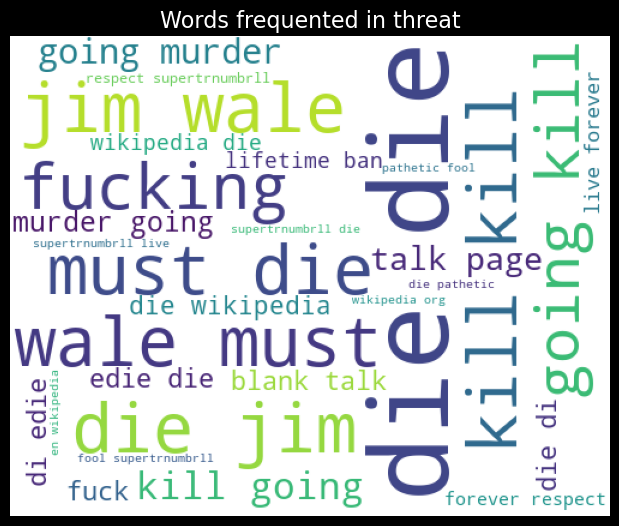

In [142]:
# Threat Word Cloud
threats = df_train['comment_text'][df_train['threat']==1]

threat_cloud = WordCloud(width=500,height=400,background_color='white',max_words=30).generate(' '.join(threats))

plt.figure(figsize=(6,6),facecolor='k')
plt.imshow(threat_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in threat",fontdict={'fontsize':16, 'color':'white'} )
plt.show()

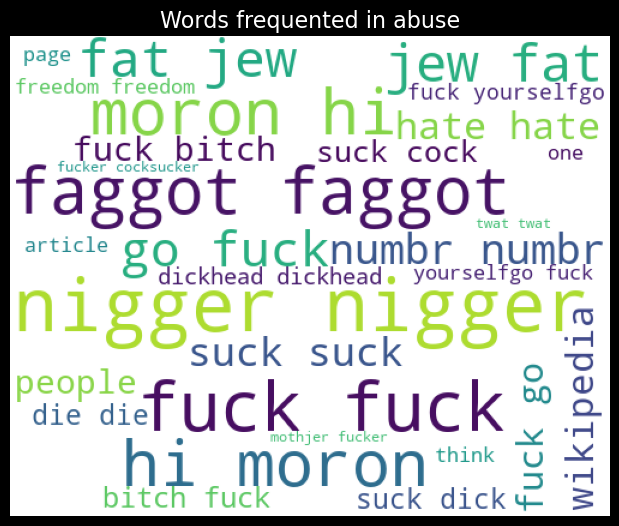

In [143]:
# Abuse Word Cloud
abuse_text = df_train['comment_text'][df_train['abuse']==1]

abuse_cloud = WordCloud(width=500,height=400,background_color='white',max_words=30).generate(' '.join(abuse_text))

plt.figure(figsize=(6,6),facecolor='k')
plt.imshow(abuse_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in abuse",fontdict={'fontsize':16, 'color':'white'} )
plt.show()

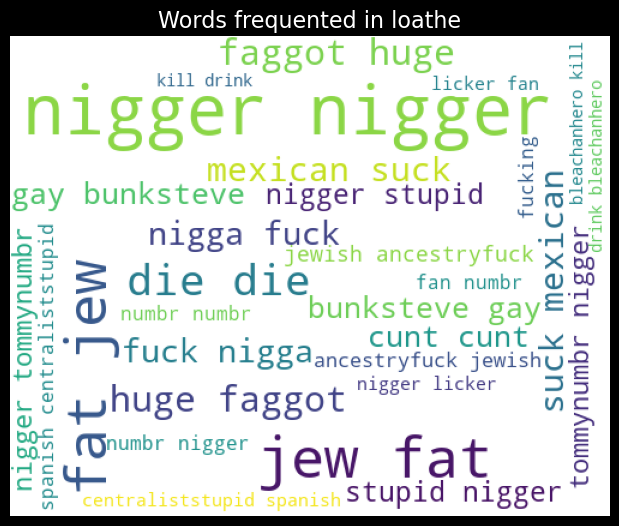

In [144]:
# Loathe Word Cloud
loathe_text = df_train['comment_text'][df_train['loathe']==1]

loathe_cloud = WordCloud(width=500,height=400,background_color='white',max_words=30).generate(' '.join(loathe_text))

plt.figure(figsize=(6,6),facecolor='k')
plt.imshow(loathe_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in loathe",fontdict={'fontsize':16, 'color':'white'} )
plt.show()

Observations:

From the above plots we can clearly see the toxic words which are indication of malignant, highly malignant, rude, threat, abuse and loathe words.
Here most frequent words used for each label is displayed in the word cloud based on different label and also when all the values are present.

Correlation

In [145]:
# Checking the correlation between features and the target
df_train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length,clean_length
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,0.967748,-0.054413,-0.052320
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,0.298666,0.010175,0.014264
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,0.702812,-0.042910,-0.039608
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,0.162925,-0.007917,-0.010046
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,0.677324,-0.045027,-0.042405
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,0.280144,-0.013628,-0.008146
label,0.967748,0.298666,0.702812,0.162925,0.677324,0.280144,1.000000,-0.051643,-0.050171
comment_length,-0.054413,0.010175,-0.042910,-0.007917,-0.045027,-0.013628,-0.051643,1.000000,0.987267
clean_length,-0.052320,0.014264,-0.039608,-0.010046,-0.042405,-0.008146,-0.050171,0.987267,1.000000


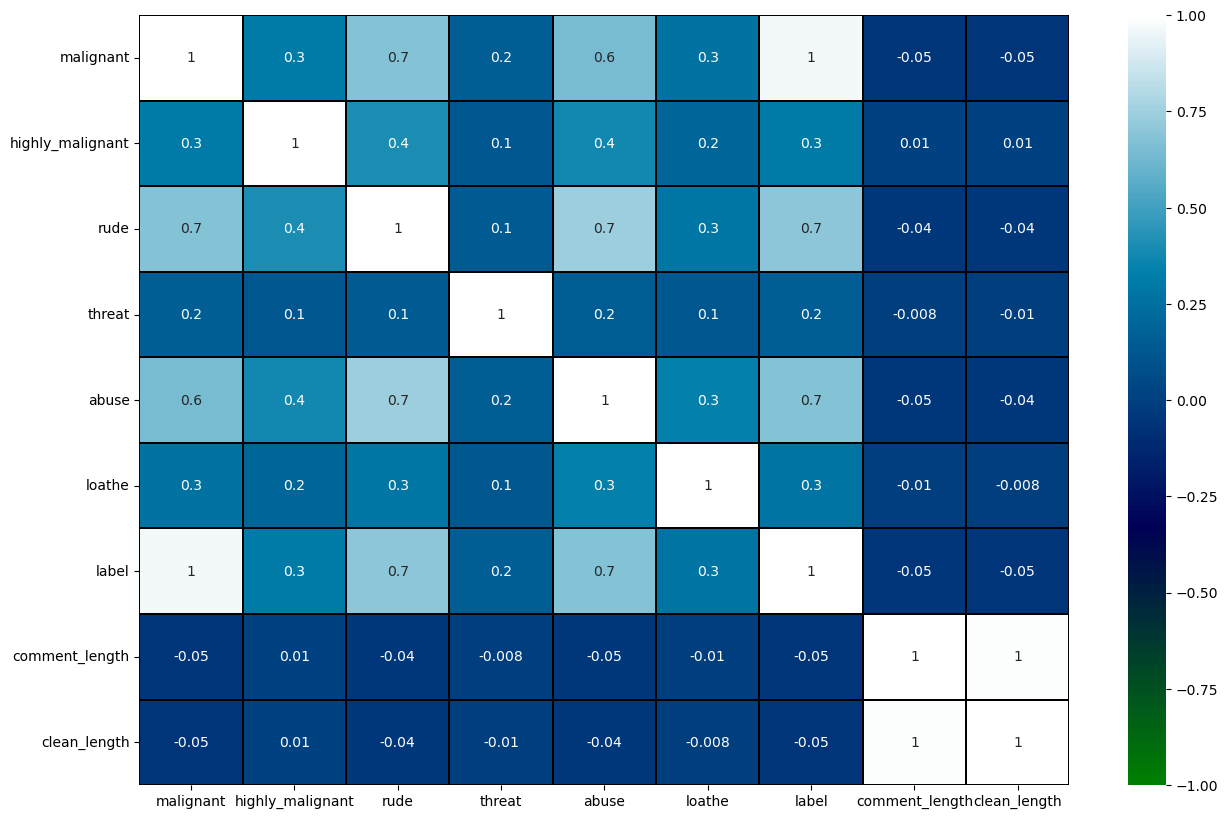

In [146]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))    
sns.heatmap(df_train.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,cmap="ocean",
            annot_kws={'size':10})
plt.yticks(rotation=0);

From the heat map we can observe the features have some strong relation with each other. We can also observe multicollinearity problem.

Converting tokens into vectors

In [147]:
# Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features=15000,stop_words='english')

In [148]:
# Separating the input and output variables represented by x and y respectively in train data and converting them
x = tf_vec.fit_transform(df_train['comment_text'])

y = df_train['label']

# Checking shape of X and y
print("Shape of x: ",x.shape)
print("Shape of y: ",y.shape)

Shape of x:  (159571, 15000)
Shape of y:  (159571,)


In [149]:
# Doing the same process for test data 
x1 = tf_vec.fit_transform(df_test['comment_text'])
x1.shape

(153164, 15000)

Model Building

In [150]:
# Splitting training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42, stratify=y)

I am taking 30% of the complete dataset for training purpose and the remaining 70% be used to train the machine learning models using the random state as 42

In [151]:
x_train.shape

(111699, 15000)

In [152]:
y_train.shape

(111699,)

In [153]:
x_test.shape

(47872, 15000)

In [154]:
y_test.shape

(47872,)

Balancing data

In [155]:
# Importing the Oversampling library and Counter
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [156]:
# We are trying to increase the points of minimum label data
OS = RandomOverSampler(0.75)
train_x,train_y = OS.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(train_y)))

The number of classes before fit Counter({0: 100342, 1: 11357})
The number of classes after fit Counter({0: 100342, 1: 75256})


We are using RandomOverSampler method to ensure that all the categories present in our label data have the same value. After applying oversampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one categor

In [157]:
# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score,hamming_loss,log_loss

from xgboost import XGBClassifier from sklearn.svm import LinearSVC from lightgbm import LGBMClassifier from sklearn.naive_bayes import MultinomialNB from sklearn.tree import DecisionTreeClassifier from sklearn.linear_model import LogisticRegression from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier from sklearn.model_selection import GridSearchCV

Logistic Regression

In [158]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
lg.fit(train_x,train_y)
pred_lg=lg.predict(x_test)

print("Accuracy score: ",accuracy_score(y_test,pred_lg))
print("Roc_auc_score: ",roc_auc_score(y_test,pred_lg))
print("Log loss : ",log_loss(y_test,pred_lg))     
print("Hamming loss: ",hamming_loss(y_test,pred_lg))
print('Confusion matrix: \n',confusion_matrix(y_test,pred_lg))
print('Classification Report:\n ',classification_report(y_test,pred_lg))

Accuracy score:  0.9447067179144385
Roc_auc_score:  0.89471645908309
Log loss :  1.9097928555529002
Hamming loss:  0.055293282085561495
Confusion matrix: 
 [[41175  1829]
 [  818  4050]]
Classification Report:
                precision    recall  f1-score   support

           0       0.98      0.96      0.97     43004
           1       0.69      0.83      0.75      4868

    accuracy                           0.94     47872
   macro avg       0.83      0.89      0.86     47872
weighted avg       0.95      0.94      0.95     47872



Decision Tree Classifier

In [159]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
pred_dtc=dtc.predict(x_test)

print("Accuracy score: ",accuracy_score(y_test,pred_dtc))
print("Roc_auc_score: ",roc_auc_score(y_test,pred_dtc))
print("Log loss : ",log_loss(y_test,pred_dtc))     
print("Hamming loss: ",hamming_loss(y_test,pred_dtc))
print('Confusion matrix: \n',confusion_matrix(y_test,pred_dtc))
print('Classification Report:\n ',classification_report(y_test,pred_dtc))

Accuracy score:  0.9283714906417112
Roc_auc_score:  0.8373493585699199
Log loss :  2.4739958267964783
Hamming loss:  0.07162850935828877
Confusion matrix: 
 [[40923  2081]
 [ 1348  3520]]
Classification Report:
                precision    recall  f1-score   support

           0       0.97      0.95      0.96     43004
           1       0.63      0.72      0.67      4868

    accuracy                           0.93     47872
   macro avg       0.80      0.84      0.82     47872
weighted avg       0.93      0.93      0.93     47872



Linear SVC

In [160]:
from sklearn.svm import LinearSVC

lsvc=LinearSVC()
lsvc.fit(train_x,train_y)
pred_lsvc=lsvc.predict(x_test)

print("Accuracy score: ",accuracy_score(y_test,pred_lsvc))
print("Roc_auc_score: ",roc_auc_score(y_test,pred_lsvc))
print("Log loss : ",log_loss(y_test,pred_lsvc))     
print("Hamming loss: ",hamming_loss(y_test,pred_lsvc))
print('Confusion matrix: \n',confusion_matrix(y_test,pred_lsvc))
print('Classification Report:\n ',classification_report(y_test,pred_lsvc))

Accuracy score:  0.9392337901069518
Roc_auc_score:  0.8844745347492853
Log loss :  2.098824141937349
Hamming loss:  0.06076620989304813
Confusion matrix: 
 [[40992  2012]
 [  897  3971]]
Classification Report:
                precision    recall  f1-score   support

           0       0.98      0.95      0.97     43004
           1       0.66      0.82      0.73      4868

    accuracy                           0.94     47872
   macro avg       0.82      0.88      0.85     47872
weighted avg       0.95      0.94      0.94     47872



MultinomialNB Classifier

In [161]:
from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()
mnb.fit(train_x,train_y)
pred_mnb=mnb.predict(x_test)

print("Accuracy score: ",accuracy_score(y_test,pred_mnb))
print("Roc_auc_score: ",roc_auc_score(y_test,pred_mnb))
print("Log loss : ",log_loss(y_test,pred_mnb))     
print("Hamming loss: ",hamming_loss(y_test,pred_mnb))
print('Confusion matrix: \n',confusion_matrix(y_test,pred_mnb))
print('Classification Report:\n ',classification_report(y_test,pred_mnb))

Accuracy score:  0.9114304812834224
Roc_auc_score:  0.8861231650920551
Log loss :  3.0591417800164473
Hamming loss:  0.08856951871657753
Confusion matrix: 
 [[39473  3531]
 [  709  4159]]
Classification Report:
                precision    recall  f1-score   support

           0       0.98      0.92      0.95     43004
           1       0.54      0.85      0.66      4868

    accuracy                           0.91     47872
   macro avg       0.76      0.89      0.81     47872
weighted avg       0.94      0.91      0.92     47872



Ada Boost Classifier

In [162]:
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier()
abc.fit(train_x,train_y)
pred_abc=abc.predict(x_test)

print("Accuracy score: ",accuracy_score(y_test,pred_abc))
print("Roc_auc_score: ",roc_auc_score(y_test,pred_abc))
print("Log loss : ",log_loss(y_test,pred_abc))     
print("Hamming loss: ",hamming_loss(y_test,pred_abc))
print('Confusion matrix: \n',confusion_matrix(y_test,pred_abc))
print('Classification Report:\n ',classification_report(y_test,pred_abc))

Accuracy score:  0.9235670120320856
Roc_auc_score:  0.8159117280714634
Log loss :  2.6399370400561666
Hamming loss:  0.07643298796791444
Confusion matrix: 
 [[40899  2105]
 [ 1554  3314]]
Classification Report:
                precision    recall  f1-score   support

           0       0.96      0.95      0.96     43004
           1       0.61      0.68      0.64      4868

    accuracy                           0.92     47872
   macro avg       0.79      0.82      0.80     47872
weighted avg       0.93      0.92      0.93     47872



XGBoost Classifier

In [163]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(train_x,train_y)
pred_xgb=xgb.predict(x_test)

print("Accuracy score: ",accuracy_score(y_test,pred_xgb))
print("Roc_auc_score: ",roc_auc_score(y_test,pred_xgb))
print("Log loss : ",log_loss(y_test,pred_xgb))     
print("Hamming loss: ",hamming_loss(y_test,pred_xgb))
print('Confusion matrix: \n',confusion_matrix(y_test,pred_xgb))
print('Classification Report:\n ',classification_report(y_test,pred_xgb))

Accuracy score:  0.9482578542780749
Roc_auc_score:  0.8545207753122581
Log loss :  1.7871303778559555
Hamming loss:  0.051742145721925134
Confusion matrix: 
 [[41808  1196]
 [ 1281  3587]]
Classification Report:
                precision    recall  f1-score   support

           0       0.97      0.97      0.97     43004
           1       0.75      0.74      0.74      4868

    accuracy                           0.95     47872
   macro avg       0.86      0.85      0.86     47872
weighted avg       0.95      0.95      0.95     47872



Extra Trees Classifier

In [165]:
from sklearn.ensemble import ExtraTreesClassifier

etc=ExtraTreesClassifier()
etc.fit(train_x,train_y)
pred_etc=etc.predict(x_test)

print("Accuracy score: ",accuracy_score(y_test,pred_etc))
print("Roc_auc_score: ",roc_auc_score(y_test,pred_etc))
print("Log loss : ",log_loss(y_test,pred_etc))     
print("Hamming loss: ",hamming_loss(y_test,pred_etc))
print('Confusion matrix: \n',confusion_matrix(y_test,pred_etc))
print('Classification Report:\n ',classification_report(y_test,pred_etc))

Accuracy score:  0.9536054478609626
Roc_auc_score:  0.8092223195763182
Log loss :  1.6024179104287066
Hamming loss:  0.04639455213903743
Confusion matrix: 
 [[42594   410]
 [ 1811  3057]]
Classification Report:
                precision    recall  f1-score   support

           0       0.96      0.99      0.97     43004
           1       0.88      0.63      0.73      4868

    accuracy                           0.95     47872
   macro avg       0.92      0.81      0.85     47872
weighted avg       0.95      0.95      0.95     47872



From the above Classifiecation Models, the highest accuracy score belongs to the Extra Trees Classifier, followed by the XGBoost Classifier and Logistic Regression Model.

Next, the Linear SVC Model followed by the AdaBooost Classifier and the Decision Tree Classifier.

Lastly the MultinomialNB Classifier Model.

Cross Validation Scores

In [166]:
from sklearn.model_selection import cross_val_score

In [167]:
scr_lg=cross_val_score(lg,x,y,cv=5,scoring='accuracy')
print("Cross validation score of this model is: ",scr_lg.mean())

Cross validation score of this model is:  0.9559381050815018


In [168]:
scr_dtc=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("Cross validation score of this model is: ",scr_dtc.mean())

Cross validation score of this model is:  0.9408789713927541


In [169]:
scr_lsvc=cross_val_score(lsvc,x,y,cv=5,scoring='accuracy')
print("Cross validation score of this model is: ",scr_lsvc.mean())

Cross validation score of this model is:  0.9592407120377594


In [171]:
scr_mnb=cross_val_score(mnb,x,y,cv=5,scoring='accuracy')
print("Cross validation score of this model is: ",scr_mnb.mean())

Cross validation score of this model is:  0.9463499000343936


In [172]:
scr_abc=cross_val_score(abc,x,y,cv=5,scoring='accuracy')
print("Cross validation score of this model is: ",scr_abc.mean())

Cross validation score of this model is:  0.9457733566448472


scr_xgb=cross_val_score(xgb,x,y,cv=5,scoring='accuracy')
print("Cross validation score of this model is: ",scr_xgb.mean())

In [174]:
scr_etc=cross_val_score(etc,x,y,cv=5,scoring='accuracy')
print("Cross validation score of this model is: ",scr_etc.mean())

Cross validation score of this model is:  0.9562765122006421


Cross validation score of this model is:  0.9562013093095418
From the above Cross Validation Scores, the highest CV score belongs to LinearSVC model, followed by the Extra Trees Classifier & Logistic Regression Model.

Next the XGBoost Classifier model , the MultinomialNB Classifier and the AdaBoost Classifier Model.

Lastly, the Decision Tree Classifier.

Plotting ROC and comparing AUC for all the models

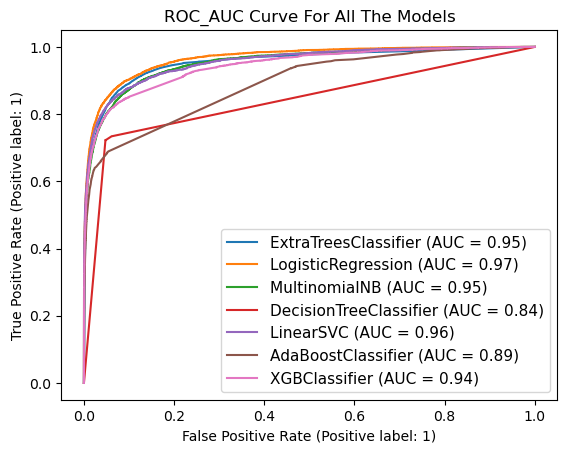

In [175]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(etc,x_test,y_test)
plot_roc_curve(lg, x_test, y_test, ax=disp.ax_)
plot_roc_curve(mnb, x_test, y_test, ax=disp.ax_)
plot_roc_curve(dtc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(lsvc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(abc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(xgb, x_test, y_test, ax=disp.ax_)
plt.title("ROC_AUC Curve For All The Models")
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Hyper Parameter Tuning

Since the Accuracy Score and the cross validation score of the Logistic Regression Model are good and the AUC score is the highest among others we shall consider this model for hyper parameter tuning.

We shall use GridSearchCV for hyper parameter tuning.

In [177]:
from sklearn.model_selection import GridSearchCV

In [178]:
parameters={
    'C': [0.2,0.3,0.4],
    'penalty': ['l1', 'l2'],
    'solver':['newton-cg','lbfgs'],
    'multi_class':['auto','ovr']}
grid_lg = GridSearchCV(lg, param_grid = parameters, cv = 4, scoring='accuracy')

In [179]:
grid_lg.fit(train_x,train_y)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.2, 0.3, 0.4], 'multi_class': ['auto', 'ovr'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs']},
             scoring='accuracy')

In [180]:
grid_lg.best_params_

{'C': 0.4, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}

In [181]:
Final_Model= LogisticRegression(C=0.4,penalty='l2',solver='newton-cg',multi_class='auto')

Final_Model.fit(train_x,train_y)
pred = Final_Model.predict(x_test)

print("Accuracy score: ",accuracy_score(y_test,pred))
print("Roc_auc_score: ",roc_auc_score(y_test,pred))
print("Log loss : ",log_loss(y_test,pred))     
print("Hamming loss: ",hamming_loss(y_test,pred))
print('Confusion matrix: \n',confusion_matrix(y_test,pred))
print('Classification Report:\n ',classification_report(y_test,pred))

Accuracy score:  0.9443307152406417
Roc_auc_score:  0.8926854810165754
Log loss :  1.9227794944214147
Hamming loss:  0.05566928475935829
Confusion matrix: 
 [[41177  1827]
 [  838  4030]]
Classification Report:
                precision    recall  f1-score   support

           0       0.98      0.96      0.97     43004
           1       0.69      0.83      0.75      4868

    accuracy                           0.94     47872
   macro avg       0.83      0.89      0.86     47872
weighted avg       0.95      0.94      0.95     47872



I have successfully incorporated the hyper parameter tuning using best parameters of Logistic Regression and the accuracy of the model has been increased after hyperparameter tuning and received the accuracy score as 94.49 % which is very good.

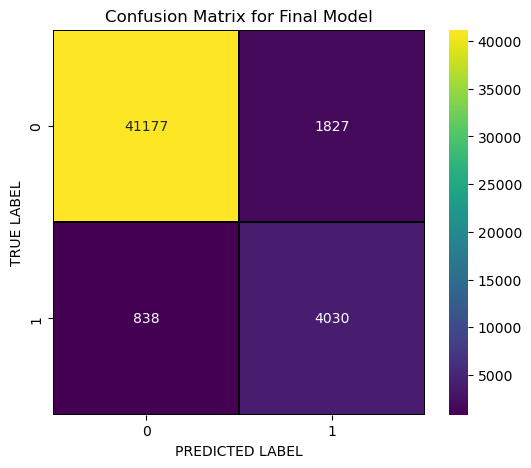

In [182]:
# Plot confusion matrix heatmap
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="viridis",
            xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Final Model')
plt.show()

ROC-AUC Curve

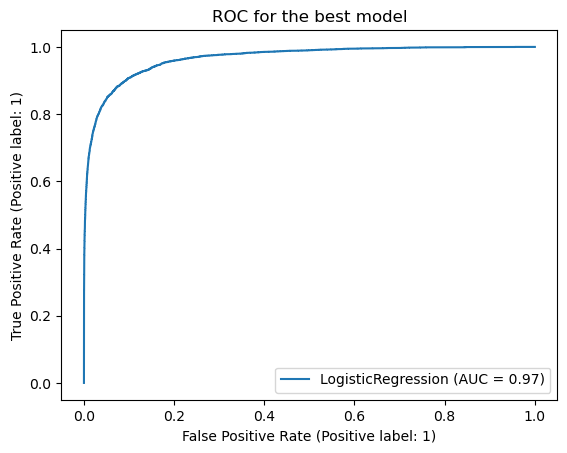

In [183]:
plot_roc_curve(Final_Model, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

Saving the Model

In [184]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_Model,"Malignant_Comments_Classifier.pkl")

['Malignant_Comments_Classifier.pkl']

In [185]:
# Loading the final model
model = joblib.load('Malignant_Comments_Classifier.pkl')

In [186]:
# Lets load the test data set
df_test

,id,comment_text,comment_length,clean_length
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,227
1,0000247867823ef7,rfc title fine imo,50,18
2,00013b17ad220c46,source zawe ashton lapland,54,26
3,00017563c3f7919a,look back source information updated correct f...,205,109
4,00017695ad8997eb,anonymously edit article,41,24
...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,37
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,198,107
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,423,238
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,502,319


In [187]:
# Predicting the values for test data after loading trained model
Predictions = model.predict(x1)
Predictions

array([0, 0, 0, ..., 0, 0, 0])

In [188]:
# Adding the predicted values to test dataframe
df_test['Predicted_Values']=Predictions
df_test

,id,comment_text,comment_length,clean_length,Predicted_Values
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,227,0
1,0000247867823ef7,rfc title fine imo,50,18,0
2,00013b17ad220c46,source zawe ashton lapland,54,26,0
3,00017563c3f7919a,look back source information updated correct f...,205,109,0
4,00017695ad8997eb,anonymously edit article,41,24,0
...,...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,37,0
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,198,107,0
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,423,238,0
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,502,319,0


In [189]:
# Checking values counts for predicted values
df_test.Predicted_Values.value_counts()

0    145758
1      7406
Name: Predicted_Values, dtype: int64

In [190]:
# Saving the data into csv file
df_test.to_csv("Malignant_Comments_Classifier_Predicted_Test_Data.csv",index=False)